Метод перебора

Введите количество городов :7
Введите расстояние между городами 1 и 2:
5
Введите расстояние между городами 1 и 3:
4
Введите расстояние между городами 1 и 4:
6
Введите расстояние между городами 1 и 5:
7
Введите расстояние между городами 1 и 6:
8
Введите расстояние между городами 1 и 7:
4
Введите расстояние между городами 2 и 3:
3
Введите расстояние между городами 2 и 4:
2
Введите расстояние между городами 2 и 5:
5
Введите расстояние между городами 2 и 6:
6
Введите расстояние между городами 2 и 7:
4
Введите расстояние между городами 3 и 4:
3
Введите расстояние между городами 3 и 5:
8
Введите расстояние между городами 3 и 6:
7
Введите расстояние между городами 3 и 7:
6
Введите расстояние между городами 4 и 5:
5
Введите расстояние между городами 4 и 6:
4
Введите расстояние между городами 4 и 7:
4
Введите расстояние между городами 5 и 6:
6
Введите расстояние между городами 5 и 7:
7
Введите расстояние между городами 6 и 7:
5
Введите координату по икс для 1 города:
0
Введите координату по икс

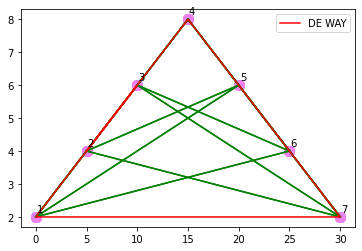

In [92]:
import time
import matplotlib.pyplot as plt
from itertools import permutations 
while True:
    try:
        quan=int(input('Введите количество городов :'))
        assert quan>0
        break
    except ValueError: print('Неверный ввод!')
    except AssertionError: print('Неверный ввод!')
        
while quan>8:
    quan=int(input('Введите количество городов снова, пожалуйста:\n'))
cities=[i for i in range(1,quan+1)] # инициализация городов по их количеству
matrix=[['-' for n in range(len(cities))] for t in range(len(cities))] #подготовка матрицы смежности
#ввод матрицы смежности
for i in range(len(cities)):
    for j in range(len(cities)):
        if i==j:
            matrix[i][j]=0
        elif matrix[i][j]!='-':
            continue
        else:
            while True:
                try:
                    d=int(input(f'Введите расстояние между городами {i+1} и {j+1}:\n'))
                    assert d>0
                    break
                except ValueError:
                    print('Неверный ввод!')
                except AssertionError:
                    print('Неверный ввод!')
            matrix[i][j]=d
            matrix[j][i]=d
x=[]
y=[]
for coord in range(len(cities)):
    while True:
        try:
            z=float(input(f'Введите координату по икс для {coord+1} города:\n'))
            x.append(z)
            break
        except ValueError:
            print('Неверный ввод координат')
for coord in range(len(cities)):
    while True:
        try:
            z=float(input(f'Введите координату по игрек для {coord+1} города:\n'))
            y.append(z)
            break
        except ValueError:
            print('Неверный ввод координат')
num=1 # номер точки
for i,j in zip(x,y): # идем по координатам и рисуем точки
    plt.scatter(x,y,100, color = 'violet')
    plt.annotate(str(num),xy=(i,j),xytext=(i+0.1, j+0.15))
    num+=1
for i,j in zip(x,y):
    for x1,y1 in zip(x,y): # идем по координатам и рисуем линии
        if i!=x1 and j!=y1:
            plt.plot([i,x1],[j,y1], color = 'green')
begin=int(input('Введите город, с которого начнется путь:\n'))
cities.append(begin) #добавляем пункт отправления в конец городов, чтобы получился кортеж
paths=[i for i in list(permutations(cities)) if i[0]==begin and i[len(i)-1]==begin] # все возможные комбинации путей по пунктам отправления и назначения
distances=[sum([matrix[i[j]-1][i[j+1]-1] for j in range(len(i)-1)]) for i in paths] # расстояния всех комбо
outcome=[min(distances),paths[distances.index(min(distances))]] # минимальное расстояние
path=' --> '.join([str(el) for el in list(outcome[1])]) # маршрут в виде строки
print('Метод перебора выполнен, вот результаты.')
for i in matrix:
    print(i)
print(f'Минимальное расстояние = {outcome[0]}\nОптимальный маршрут, начинающийся с точки,номер которой Вы указали : {path}')
plt.plot([x[i-1] for i in list(outcome[1])], [y[i-1] for i in list(outcome[1])], color='red', label='DE WAY') # рисуем оптимальный путь на графе
plt.legend()

In [ ]:
7

0 5 4 6 7 8 4 
5 0 3 2 5 6 4
4 3 0 3 8 7 6 
6 2 3 0 5 4 4 
7 5 8 5 0 6 7 
8 6 7 4 6 0 5
4 4 6 4 7 5 0

29 

23176542

In [ ]:
5

0 4 3 8 6
4 0 4 7 2
3 4 0 4 6
8 7 4 0 4
6 2 6 4 0

17
213452

In [ ]:
4
0 1 6 3
1 0 1 9
6 1 0 1
3 9 1 0

1->2 2->3 3->4 4->1
6

In [ ]:
0 10 1 1
10 0 1 5
1 1 0 10
1 5 10 0

1->4 4->2 2->3 3->1
8

In [ ]:
4
0 1 1 7
1 0 7 1
1 7 0 1
7 1 1 0

2->4 4->3 3->1 1->2
4

Метод ветвей и границ

In [13]:
#Создание матрицы
def enter_matrix(n):
    matrix=[['-' for i in range(n)] for t in range(n)]
    for i in range(n):
        for j in range(n):
            if i==j:
                matrix[i][j]=0
            elif matrix[i][j]!='-':
                continue
            else:
                while True:
                    try:
                        d=int(input(f'Введите расстояние между городами {i+1} и {j+1}:\n'))
                        assert d>0
                        break
                    except ValueError:
                        print('Неверный ввод!')
                    except AssertionError:
                        print('Неверный ввод!')
                matrix[i][j]=d
                matrix[j][i]=d
    for i in range(n):
        matrix[i][i]=float('inf')
    return matrix

#Функция нахождения минимального элемента
def Minimum(massive,index):
    mini=1000
    for x in enumerate(massive):
        if x[0]!=index: mini=min(x[1],mini)
    return mini

while True:
    try:
        n=int(input('Введите количество городов :'))
        assert n>0
        break
    except ValueError: print('Неверный ввод!')
    except AssertionError: print('Неверный ввод!')
    
def print_matrix(matrix,n):
    for i in range(n):
        copy_matrix.append(matrix[i].copy())
    print()
    for i in matrix: print(i)
    print()
    
h,dlina=0,0
matrix,stroki,rows,res,result,copy_matrix=[],[],[],[],[],[]

#Вывод матрицы
matrix=enter_matrix(n)
print_matrix(matrix,n)
for i in range(n):
        stroki.append(i)
        rows.append(i)
#Бесконечный цикл
while True:
    #Вычитаем минимальный элемент во всех строках
    for i in range(len(matrix)):
        naim=min(matrix[i])
        h+=naim
        for j in range(len(matrix)): matrix[i][j]-=naim
    #Вычитаем минимальный элемент во всех столбцах    
    for i in range(len(matrix)):
        naim = min(row[i] for row in matrix)
        h+=naim
        for j in range(len(matrix)): matrix[j][i]-=naim
    #Оцениваем нулевые клетки и ищем нулевую клетку с максимальной оценкой
    nolik,i1,i2,shag=0,0,0,0
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j]==0:
                shag=Minimum(matrix[i],j)+Minimum((row[j] for row in matrix),i)
                if shag>=nolik:
                    nolik=shag
                    i1=i
                    i2=j         
    #Запись пути
    res.append(stroki[i1]+1)
    res.append(rows[i2]+1)
    old_i1,old_i2=stroki[i1],rows[i2]
    if old_i2 in stroki:
        if old_i1 in rows:
            new_i1=stroki.index(old_i2)#Сохраняем индексы
            new_i2=rows.index(old_i1)
            matrix[new_i1][new_i2]=float('inf')
    del stroki[i1]
    del rows[i2]
    del matrix[i1] #Удаляем столбец и строчку в матрице
    for i in matrix: del i[i2]
    if len(matrix)==1: break
#Создаём порядок пути
for i in range(0,len(res)-1,2): #Устанавливаем шаг, так как точки пвторяются
    if res.count(res[i])<2:
        result.append(res[i])
        result.append(res[i+1])
for i in range(0,len(res)-1,2):
    for j in range(0,len(res)-1,2):
        if result[len(result)-1]==res[j]:
            result.append(res[j])
            result.append(res[j+1])
#Считаем длину пути
for i in range(0,len(result)-1,2):
    if i==len(result)-2:
        dlina+=copy_matrix[result[i]-1][result[i+1]-1]
        dlina+=copy_matrix[result[i+1]-1][result[0]-1]
    else: dlina+=copy_matrix[result[i]-1][result[i+1]-1]     
#Вывод пути            
zi=result[-1]
resi=result
resi.reverse()
err=''
print('Оптимальный порядок методом ветвей и границ : ',end='')
for i in range (len(resi)):
    if resi[i]!=resi[i-1]:
        err+=str(resi[i])
err+=str(zi)
for i in range (len(err)):
    if i!=len(err)-1:
        print(err[i]+' --> ',end='')
    else:
        print(err[i])
print('Длина : ',end='')
print(dlina)


Введите количество городов :7
Введите расстояние между городами 1 и 2:
5
Введите расстояние между городами 1 и 3:
4
Введите расстояние между городами 1 и 4:
6
Введите расстояние между городами 1 и 5:
7
Введите расстояние между городами 1 и 6:
8
Введите расстояние между городами 1 и 7:
4
Введите расстояние между городами 2 и 3:
3
Введите расстояние между городами 2 и 4:
2
Введите расстояние между городами 2 и 5:
5
Введите расстояние между городами 2 и 6:
6
Введите расстояние между городами 2 и 7:
4
Введите расстояние между городами 3 и 4:
3
Введите расстояние между городами 3 и 5:
8
Введите расстояние между городами 3 и 6:
7
Введите расстояние между городами 3 и 7:
6
Введите расстояние между городами 4 и 5:
5
Введите расстояние между городами 4 и 6:
4
Введите расстояние между городами 4 и 7:
4
Введите расстояние между городами 5 и 6:
6
Введите расстояние между городами 5 и 7:
7
Введите расстояние между городами 6 и 7:
5

[inf, 5, 4, 6, 7, 8, 4]
[5, inf, 3, 2, 5, 6, 4]
[4, 3, inf, 3, 8, 

In [14]:
#Создание матрицы
def enter_matrix(n):
    matrix=[['-' for i in range(n)] for t in range(n)]
    for i in range(n):
        for j in range(n):
            if i==j:
                matrix[i][j]=0
            elif matrix[i][j]!='-':
                continue
            else:
                while True:
                    try:
                        d=int(input(f'Введите расстояние между городами {i+1} и {j+1}:\n'))
                        assert d>0
                        break
                    except ValueError:
                        print('Неверный ввод!')
                    except AssertionError:
                        print('Неверный ввод!')
                matrix[i][j]=d
                matrix[j][i]=d
    for i in range(n):
        matrix[i][i]=float('inf')
    return matrix

#Функция нахождения минимального элемента
def Minimum(massive,index):
    mini=1000
    for x in enumerate(massive):
        if x[0]!=index: mini=min(x[1],mini)
    return mini

while True:
    try:
        n=int(input('Введите количество городов :'))
        assert n>0
        break
    except ValueError: print('Неверный ввод!')
    except AssertionError: print('Неверный ввод!')
    
def print_matrix(matrix,n):
    for i in range(n):
        copy_matrix.append(matrix[i].copy())
    print()
    for i in matrix: print(i)
    print()

h,dlina=0,0
matrix,stroki,rows,res,result,copy_matrix=[],[],[],[],[],[]

#Вывод матрицы
matrix=enter_matrix(n)
print_matrix(matrix,n)
for i in range(n):
        stroki.append(i)
        rows.append(i)
#Бесконечный цикл
while True:
    #Вычитаем минимальный элемент во всех строках
    for i in range(len(matrix)):
        naim=min(matrix[i])
        h+=naim
        for j in range(len(matrix)): matrix[i][j]-=naim
    #Вычитаем минимальный элемент во всех столбцах    
    for i in range(len(matrix)):
        naim = min(row[i] for row in matrix)
        h+=naim
        for j in range(len(matrix)): matrix[j][i]-=naim
    #Оцениваем нулевые клетки и ищем нулевую клетку с максимальной оценкой
    nolik,i1,i2,shag=0,0,0,0
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j]==0:
                shag=Minimum(matrix[i],j)+Minimum((row[j] for row in matrix),i)
                if shag>=nolik:
                    nolik=shag
                    i1=i
                    i2=j         
    #Запись пути
    res.append(stroki[i1]+1)
    res.append(rows[i2]+1)
    old_i1,old_i2=stroki[i1],rows[i2]
    if old_i2 in stroki:
        if old_i1 in rows:
            new_i1=stroki.index(old_i2)#Сохраняем индексы
            new_i2=rows.index(old_i1)
            matrix[new_i1][new_i2]=float('inf')
    del stroki[i1]
    del rows[i2]
    del matrix[i1] #Удаляем столбец и строчку в матрице
    for i in matrix: del i[i2]
    if len(matrix)==1: break
#Создаём порядок пути
for i in range(0,len(res)-1,2): #Устанавливаем шаг, так как точки пвторяются
    if res.count(res[i])<2:
        result.append(res[i])
        result.append(res[i+1])
for i in range(0,len(res)-1,2):
    for j in range(0,len(res)-1,2):
        if result[len(result)-1]==res[j]:
            result.append(res[j])
            result.append(res[j+1])
#Считаем длину пути
for i in range(0,len(result)-1,2):
    if i==len(result)-2:
        dlina+=copy_matrix[result[i]-1][result[i+1]-1]
        dlina+=copy_matrix[result[i+1]-1][result[0]-1]
    else: dlina+=copy_matrix[result[i]-1][result[i+1]-1]     
#Вывод пути            
zi=result[-1]
resi=result
resi.reverse()
err=''
print('Оптимальный порядок методом ветвей и границ : ',end='')
for i in range (len(resi)):
    if resi[i]!=resi[i-1]:
        err+=str(resi[i])
err+=str(zi)
for i in range (len(err)):
    if i!=len(err)-1:
        print(err[i]+' --> ',end='')
    else:
        print(err[i])
print('Длина : ',end='')
print(dlina)


Введите количество городов :4
Введите расстояние между городами 1 и 2:
1
Введите расстояние между городами 1 и 3:
6
Введите расстояние между городами 1 и 4:
3
Введите расстояние между городами 2 и 3:
1
Введите расстояние между городами 2 и 4:
9
Введите расстояние между городами 3 и 4:
1

[inf, 1, 6, 3]
[1, inf, 1, 9]
[6, 1, inf, 1]
[3, 9, 1, inf]

Оптимальный порядок методом ветвей и границ : 1 --> 2 --> 3 --> 4 --> 1
Длина : 6


In [ ]:
7

0 5 4 6 7 8 4 
5 0 3 2 5 6 4
4 3 0 3 8 7 6 
6 2 3 0 5 4 4 
7 5 8 5 0 6 7 
8 6 7 4 6 0 5
4 4 6 4 7 5 0

29 

23176542

In [ ]:
5

0 4 3 8 6
4 0 4 7 2
3 4 0 4 6
8 7 4 0 4
6 2 6 4 0

17
213452

In [ ]:
4
0 1 6 3
1 0 1 9
6 1 0 1
3 9 1 0

1->2 2->3 3->4 4->1
6

In [ ]:
0 10 1 1
10 0 1 5
1 1 0 10
1 5 10 0

1->4 4->2 2->3 3->1
8

In [ ]:
4
0 1 1 7
1 0 7 1
1 7 0 1
7 1 1 0

2->4 4->3 3->1 1->2
4